<a href="https://colab.research.google.com/github/gongback39/2024_2_Data_analysis/blob/main/1%EB%B6%84%EB%B0%98/%EC%9D%B4%EC%A7%80%EB%AF%BC/4%EC%A3%BC%EC%B0%A8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API
* 인증된 URL만 있으면 언제든지 필요한 데이터에 편리하게 접근할 수 있는 방식
* 두 프로그램이 서로 대화하기 위한 방법을 정의한 것.
* 두 프로그램이 데이터를 주고받는 규칙이 다르면 올바르게 데이터를 처리하지 못함

e.g) 운영체제는 문서작성 프로그램이 디스크에 있는 파일을 일고 쓸수 있는 API를 제공

## HTTP; 웹 페이지를 전송하기 위한 통신 규약

웹사이트는 웹페이지를 서비스하기 위해 웹서버 소프트웨어를 사용한다.

e.g) 엔진엑스, 아파치

이런 웹 서버 프로그램은 웹 브라우저와 통신할때 HTTP란 프로토콜을 사용한다.

### HTTP
인터넷에서 웹페이지를 전송하는 기본 통신 방법.

* 웹 브라우저가 웹 서버에 웹 페이지를 요청하면, 웹 서버는 요청에 맞는 웹페이지를 웹브라우저에 전송

HTTP 프로토콜을 사용해 API를 만드는 것이 웹 기반 API이다.

요기서,

HTTP 프로토콜을 사용해 주고받는 데이터는 csv, json, xml과 같은 파일을 사용한다.

웹 브라우저가 화면에 표시할 수 있는 문서는 html이지만 복잡한 구조를 가지고 있어 데이터를 주고받는데에는 사용되지 않는다.



## json
javascript object notation

원래는 자바스크립트 언어를 위해 만드어 졌지만 현재는 범용적인 포맷으로 사용된다.

마치 딕셔너리와 리스트를 중첩해 놓은 것과 비슷하다.
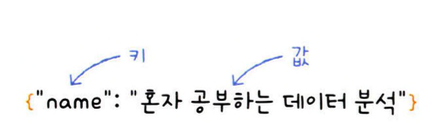

### 파이썬 객체 to json 문자열; json.dumps()

In [2]:
import json

d = {"name": "혼자 공부하는 데이터 분석"}

d_str = json.dumps(d, ensure_ascii = False)
print(d_str)
print(type(d_str))

{"name": "혼자 공부하는 데이터 분석"}
<class 'str'>


json 문자열 to 파이썬 객체; json.loads()

seralizatioin(직렬화): 프로그램 상의 객체를 저장하거나 읽을 수 있는 형태로 변환하는 것

deserialization(역직렬화): 직렬화된 정보를 다시 프로그램에서 실행 가능한 객체로 변환하는 것

In [4]:
d2 = json.loads(d_str)
print(d2['name'])
print(type(d2))

혼자 공부하는 데이터 분석
<class 'dict'>


In [7]:
d3 = json.loads(
    '{"name": "혼자 공부하는 데이터 분석",\
     "author": "박해선",\
     "year": 2022}'
)

print(d3['name'])
print(d3['author'])
print(d3['year'])

혼자 공부하는 데이터 분석
박해선
2022


In [8]:
d3 = json.loads(
    '{"name": "혼자 공부하는 데이터 분석",\
     "author": ["박해선", "홍길동"],\
     "year": 2022}'
)

print(d3['name'])
print(d3['author'])
print(d3['year'])

혼자 공부하는 데이터 분석
['박해선', '홍길동']
2022


In [9]:
print(d3['author'][1])

홍길동


In [12]:
d4_str = """[
  {
      "name": "혼자 공부하는 데이터 분석",\
      "author": "박해선",\
      "year": 2022
  },
  {
      "name": "혼자 공부하는 머신러닝+딥러닝",\
      "author": "박해선",\
      "year": 2020
  }
]"""
d4 = json.loads(d4_str)
print(d4[0]['name'])

혼자 공부하는 데이터 분석


### json 문자열 to 데이터 프레임; read_json()

In [13]:
import pandas as pd
pd.read_json(d4_str)

<ipython-input-13-84823bfe0278>:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pd.read_json(d4_str)


,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝+딥러닝,박해선,2020


In [14]:
pd.DataFrame(d4)

,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝+딥러닝,박해선,2020


## XML
eXtensible Markup Language

컴퓨터와 사람이 모두 읽고 쓰기 편한 문서 포맷을 위해 고안
* element들이 계층 구조를 이루면서 정보를 표현
  *  element는 시작 태그와 종료 태그로 감쌈
  *  tag는 '<' 기호로 시작해서 '>' 기호로 끝나며, 태그의 이름은 영문자와 숫자를 사용한다.
* element는 상위, 하위 element를 사질 수 있다.
  * 부모 노드(or element), 자식 노드(or element)



### XML 문자열 to 파이썬 객체; fromstring()
파이썬에서 기본으로 제공되는 xml 패키지는 XML 문서를 읽고 쓸 수 있는 간편한 API를 제공한다.

In [21]:
import xml.etree.ElementTree as et

x_str = """
<book>
  <name>혼자 공부하는 데이터 분석</name>
  <author>백해선</author>
  <year>2022</year>
</book>
"""
book = et.fromstring(x_str)
print(type(book))
print(book.tag)

<class 'xml.etree.ElementTree.Element'>
book


### 자식 엘리먼트 확인하기; findtext()

In [23]:
book_childs = list(book)
print(book_childs)
name, author, year = book_childs
print(name.text)
print(author.text)
print(year.text)

[<Element 'name' at 0x780cba7ff560>, <Element 'author' at 0x780cba7ff790>, <Element 'year' at 0x780cba7ffc40>]


In [26]:
name = book.findtext('name')
author = book.findtext('author')
year = book.findtext('year')
print(name)
print(author)
print(year)

혼자 공부하는 데이터 분석
백해선
2022


In [29]:
x2_str = """
<books>
  <book>
    <name>혼자 공부하는 데이터 분석</name>
    <author>박해선</author>
    <year>2022</year>
  </book>
  <book>
    <name>혼자 공부하는 머신러닝+딥러닝</name>
    <author>박해선</author>
    <year>2020</year>
  </book>
</books>
"""
books = et.fromstring(x2_str)
print(books.tag)

books


### 여러 개의 자식 엘리먼트 확인하기; findall()

동일한 이름을 가진 여러 개의 자식 엘리먼트를 찾을 때 유용

In [30]:
for book in books.findall('book'):
  name = book.findtext('name')
  author = book.findtext('author')
  year = book.findtext('year')
  print(name)
  print(author)
  print(year)
  print()

혼자 공부하는 데이터 분석
박해선
2022

혼자 공부하는 머신러닝+딥러닝
박해선
2020

